### Application 3

### Import necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import SelectKBest, f_classif



### Load dataset

In [31]:

# Specify the separator as semicolon to correctly parse the CSV file
data = pd.read_csv(r'C:\Users\粟登洋\Desktop\bank.csv', sep=';')

# Display first few rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Data preprocessing

In [32]:
# Handle missing values if any
data = data.dropna()

# Convert categorical features to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split dataset into features and target
X = data.drop('y_yes', axis=1)  # Assuming 'y_yes' is the target column after get_dummies
y = data['y_yes']

# Select top two numerical features with highest variance for visualization purposes
numerical_features = X.select_dtypes(include=[np.number])
feature_variances = numerical_features.var().sort_values(ascending=False)
top_two_features = feature_variances.index[:2]
X_new = numerical_features[top_two_features]
print(f"Selected features for visualization: {top_two_features}")

Selected features for visualization: Index(['balance', 'duration'], dtype='object')


### Plotting feature importance/correlation with target

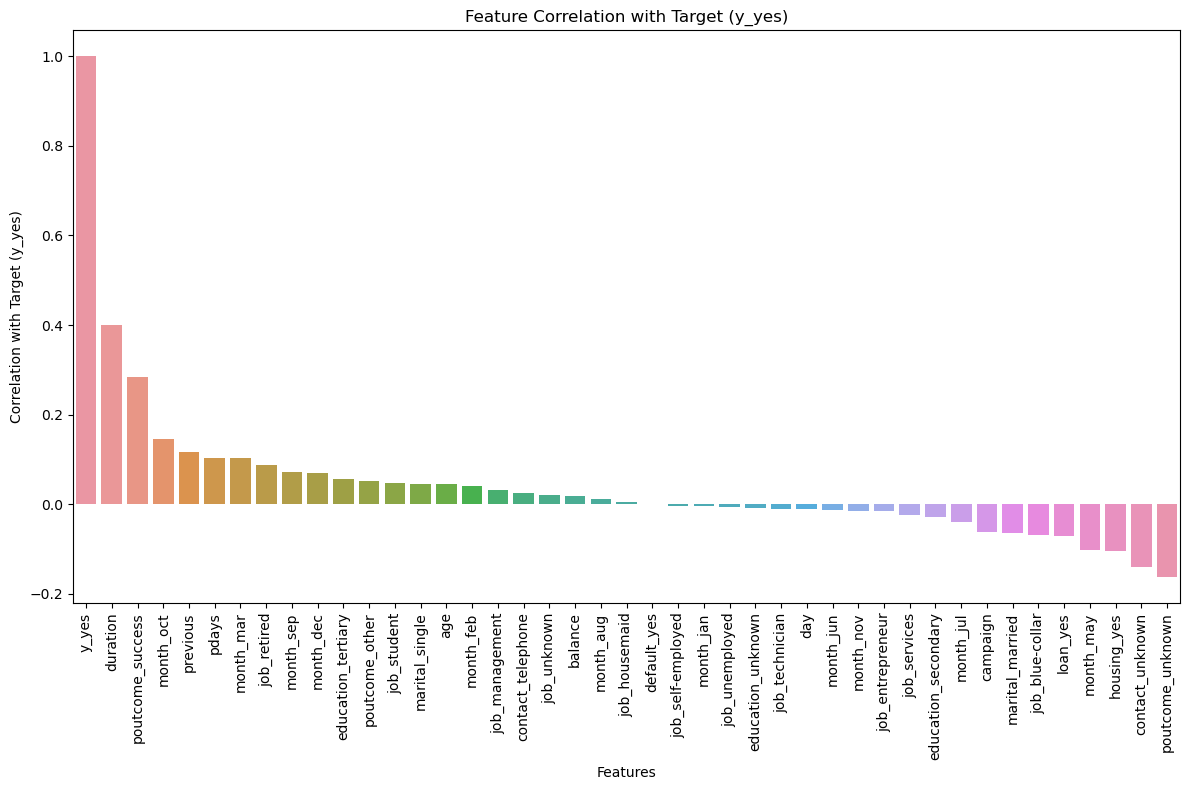

In [33]:
correlations = data.corr()['y_yes'].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target (y_yes)')
plt.title('Feature Correlation with Target (y_yes)')
plt.tight_layout()
plt.show()

### Split the dataset into training and testing sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Finding the best n_neighbors for KNN

Best n_neighbors: 36 with accuracy: 0.8931466470154753


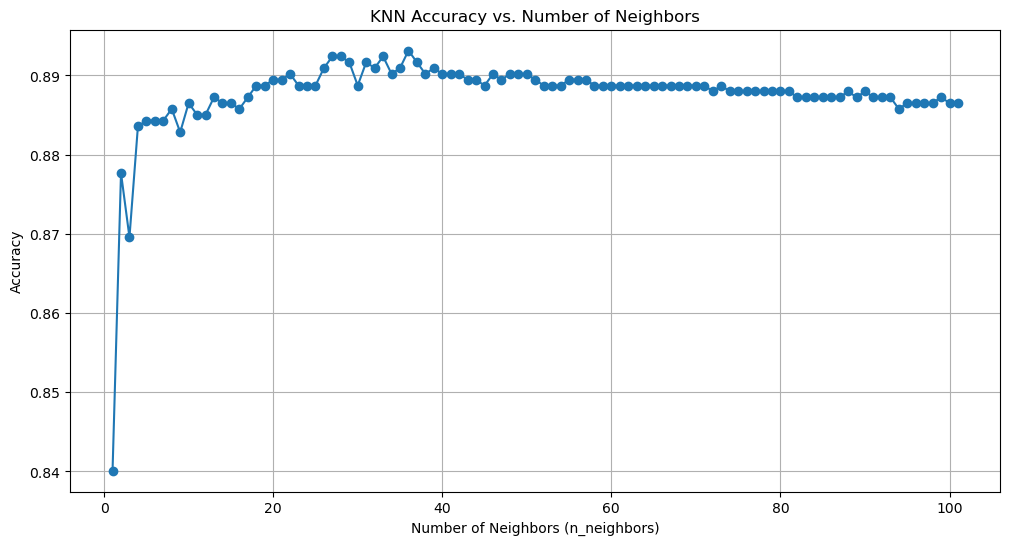

In [37]:

accuracies_knn = []
best_accuracy = 0
best_n_neighbors = 1

for n in range(1, 102):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies_knn.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n

print(f"Best n_neighbors: {best_n_neighbors} with accuracy: {best_accuracy}")

# Plotting accuracy vs. n_neighbors
plt.figure(figsize=(12, 6))
plt.plot(range(1, 102), accuracies_knn, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid()
plt.show()

### Different classification

In [38]:

# K-Nearest Neighbors Classifier with best n_neighbors
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Support Vector Machine Classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

### Classification reports and confusion matrices

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.56      0.22      0.32       152

    accuracy                           0.89      1357
   macro avg       0.73      0.60      0.63      1357
weighted avg       0.87      0.89      0.87      1357

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.48      0.18      0.27       152

    accuracy                           0.89      1357
   macro avg       0.69      0.58      0.60      1357
weighted avg       0.86      0.89      0.86      1357

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1205
           1       0.24      0.28      0.26       152

    accuracy                           0.82      1357
  

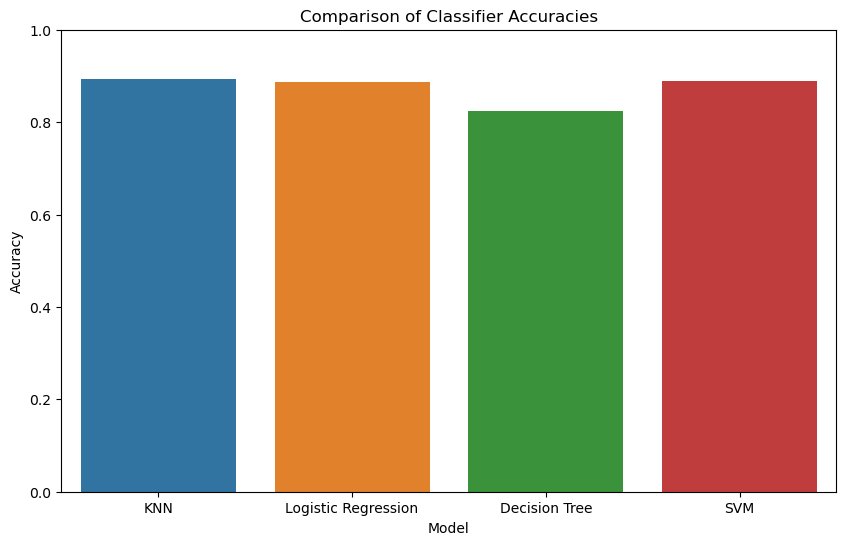

In [39]:
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Support Vector Machine Classification Report:\n", classification_report(y_test, y_pred_svm))

# Visualize classification results
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_svm)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)
plt.show()

### Confusion matrix visualization

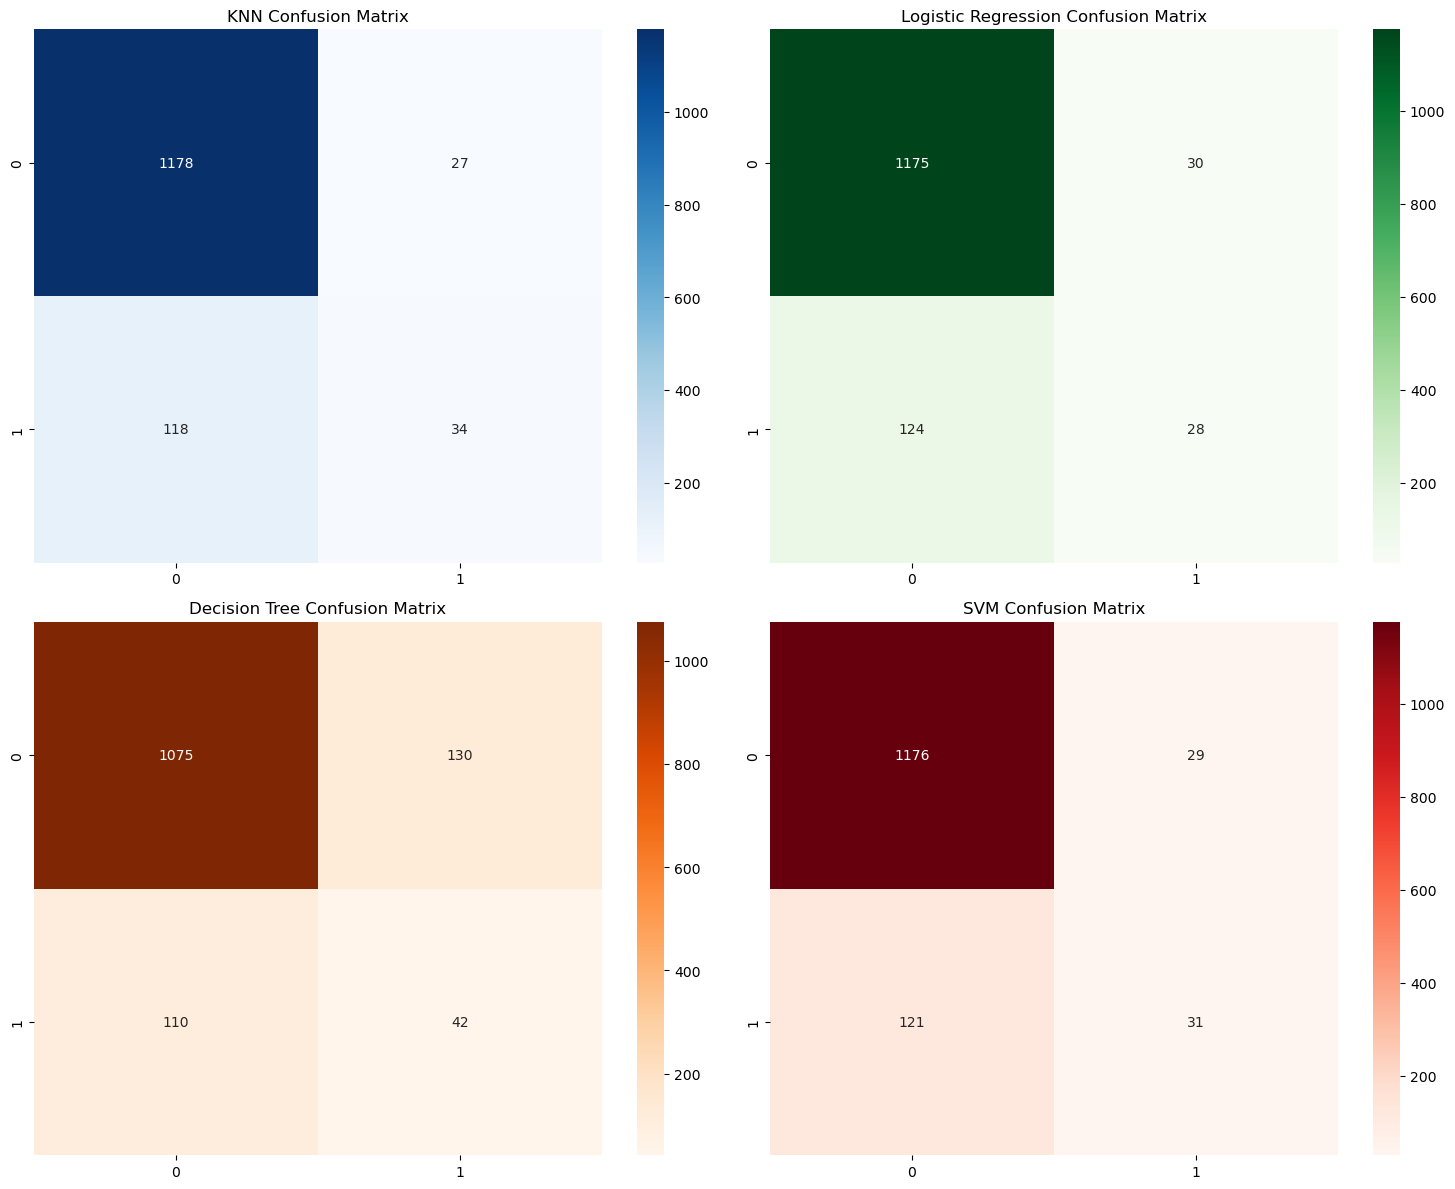

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('KNN Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Decision Tree Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds', ax=axes[1, 1])
axes[1, 1].set_title('SVM Confusion Matrix')

plt.tight_layout()
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### Visualizing decision boundaries for all models (using top two features)

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

classifiers = [
    ('KNN', knn),
    ('Logistic Regression', log_reg),
    ('Decision Tree', dt),
    ('SVM', svm)
]

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

for idx, (name, clf) in enumerate(classifiers):
    clf.fit(X_set, y_set)
    Z = clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    axes[idx].contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    axes[idx].set_xlim(X1.min(), X1.max())
    axes[idx].set_ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        axes[idx].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(['#FF0000', '#0000FF'])(i), label=j)
    axes[idx].set_title(f'{name} Decision Boundary')
    axes[idx].set_xlabel(top_two_features[0])
    axes[idx].set_ylabel(top_two_features[1])
    axes[idx].legend()

plt.tight_layout()
plt.show()